# Forest Analysis
Analyzing the worst model.

In [1]:
# imports
import os
import pickle

import numpy as np
import pandas as pd


## Getting Data

In [2]:
data = pd.read_csv('new_Exam_Score_Prediction.csv')

y = data['exam_score']
X = data.drop('exam_score', axis=1)

data

,study_hours,class_attendance,facility_rating,gender,coaching,self_study,exam_score
0,2.78,92.9,0,1,1,0,58.9
1,7.88,76.8,2,1,1,0,90.3
2,0.89,71.6,0,0,1,0,43.7
3,3.48,65.4,0,1,0,0,58.2
4,1.35,69.0,2,0,0,0,53.7
...,...,...,...,...,...,...,...
13269,5.74,81.4,2,1,0,0,95.0
13270,3.28,73.3,2,0,0,0,93.9
13271,3.71,41.6,1,1,1,0,60.9
13272,4.60,76.3,1,1,0,1,79.0


# Getting Model

In [3]:
with open(os.path.join('pipes', 'Forest.pkl'), 'rb') as f:
    Pipe = pickle.load(f)

Pipe

Pipeline(steps=[('sclaer', StandardScaler()),
                ('regressor',
                 RandomForestRegressor(max_depth=7, n_estimators=178))])

# Metric

In [4]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


def metric(y_hat, y_true,features_shape):
    n,p = features_shape
    r2 = r2_score(y_true, y_hat)
    socres = {
        "MAE": mean_absolute_error(y_true, y_hat),
        "MSE": mean_squared_error(y_true, y_hat),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_hat)),
        "R2": r2,
        "Adjusted R2":  1 - (1 - r2) * (n - 1) / (n - p - 1)
    }

    df_score = pd.DataFrame(socres.items(), columns=["Metric","Value"])

    return df_score

# Feature Importance

In [5]:
forest = Pipe.named_steps['regressor']
forest.fit(X, y)

RandomForestRegressor(max_depth=7, n_estimators=178)

[]

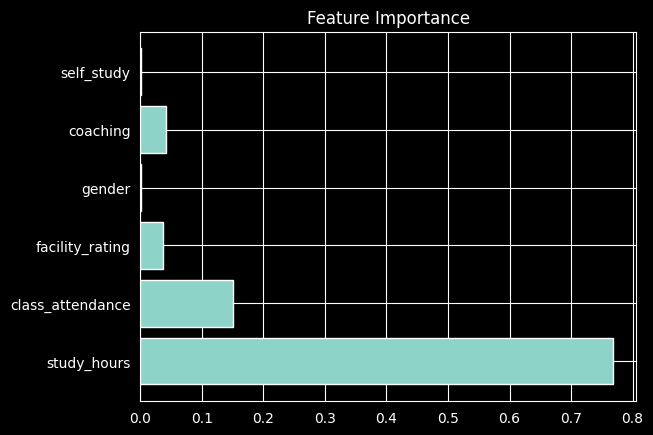

In [6]:
from matplotlib import pyplot as plt

importance = forest.feature_importances_

plt.barh(X.columns, importance)
plt.title("Feature Importance")
plt.plot()

# Drawing a tree

## Building a small tree
upon two best features. To s

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

best_features = ['study_hours', 'class_attendance']
x_train, x_test, y_train, y_test = train_test_split(X[best_features], y, test_size = 0.3, random_state = 42)

tree = DecisionTreeRegressor(random_state=42, max_depth=6, max_leaf_nodes=10)

tree.fit(x_train, y_train)

pred = tree.predict(x_train)
metric(pred, y_train, [x_train.shape[0], len(best_features)])

,Metric,Value
0,MAE,10.025704
1,MSE,154.101587
2,RMSE,12.413766
3,R2,0.570655
4,Adjusted R2,0.570563


## Drawing a tree

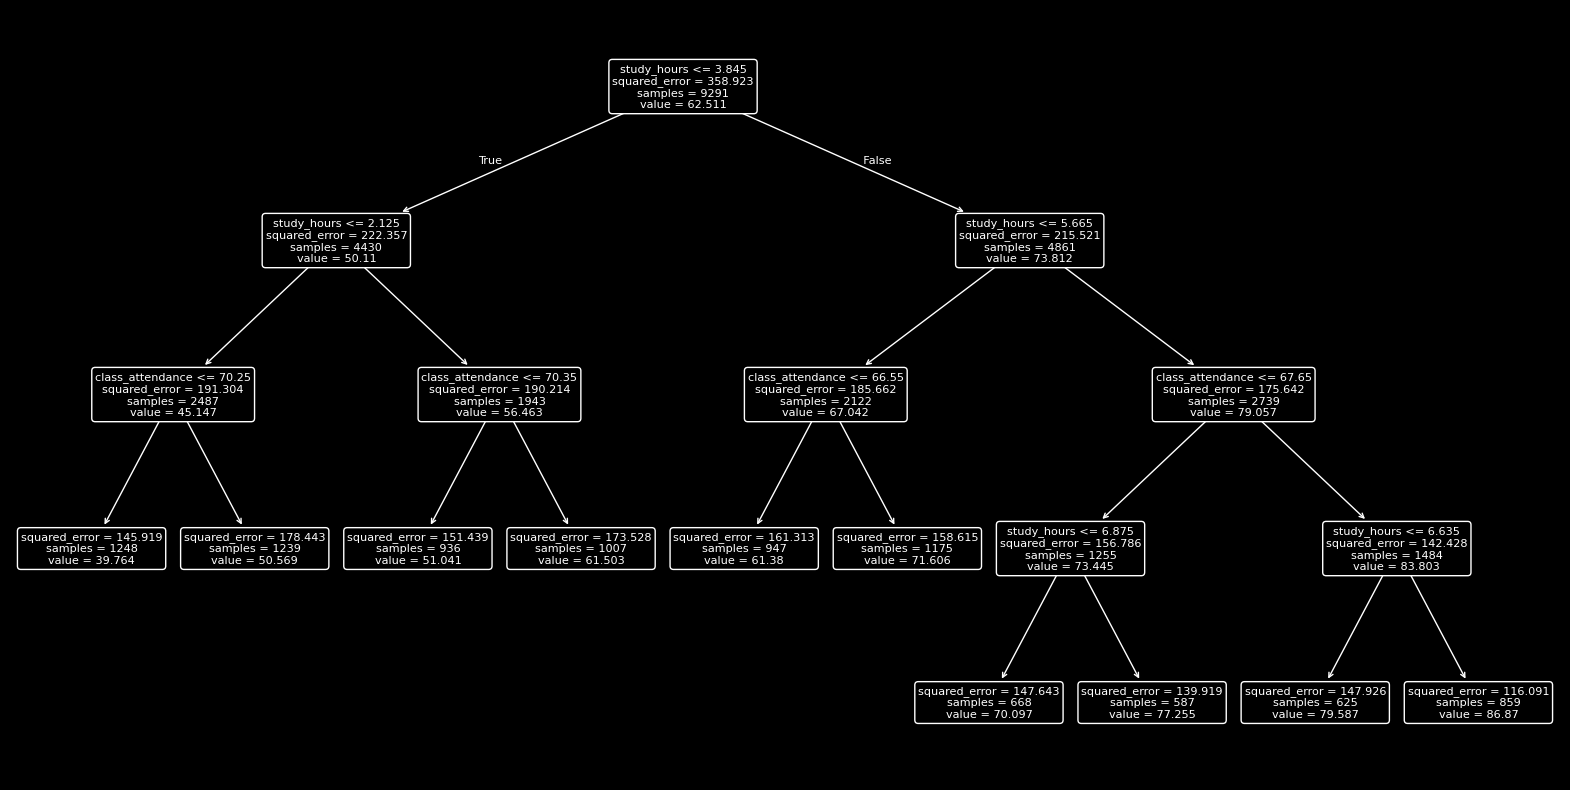

In [10]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(tree,
          feature_names=best_features,
          filled=False,
          rounded=True)
plt.show()